In [1]:
#!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/Oct-2019/train_labels.tar.gz

--2019-11-23 07:37:11--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/Oct-2019/train_labels.tar.gz
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.11, 130.117.252.12
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1787596 (1.7M) [application/x-tar]
Saving to: 'train_labels.tar.gz'

train_labels.tar.gz 100%[===================>]   1.70M  --.-KB/s    in 0.05s   

2019-11-23 07:37:12 (35.8 MB/s) - 'train_labels.tar.gz' saved [1787596/1787596]



In [2]:
#!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/Oct-2019/train_images.tar.gz

--2019-11-23 07:37:29--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/Oct-2019/train_images.tar.gz
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.11, 130.117.252.12, 130.117.252.10
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26062948858 (24G) [application/x-tar]
Saving to: 'train_images.tar.gz'

train_images.tar.gz 100%[===================>]  24.27G  72.4MB/s    in 6m 44s  

2019-11-23 07:44:13 (61.5 MB/s) - 'train_images.tar.gz' saved [26062948858/26062948858]



In [3]:
#!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/Oct-2019/test_metadata_small.tar.gz

--2019-11-23 08:02:07--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/Oct-2019/test_metadata_small.tar.gz
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.12, 130.117.252.10, 130.117.252.11
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2612 (2.6K) [application/x-gzip]
Saving to: 'test_metadata_small.tar.gz'

test_metadata_small 100%[===================>]   2.55K  --.-KB/s    in 0s      

2019-11-23 08:02:08 (50.4 MB/s) - 'test_metadata_small.tar.gz' saved [2612/2612]



In [4]:
#!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/Oct-2019/test_images_small.tar.gz

--2019-11-23 08:02:18--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/snakes-challenge/Oct-2019/test_images_small.tar.gz
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.11, 130.117.252.12
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58869614 (56M) [application/x-gzip]
Saving to: 'test_images_small.tar.gz'

test_images_small.t 100%[===================>]  56.14M  76.1MB/s    in 0.7s    

2019-11-23 08:02:19 (76.1 MB/s) - 'test_images_small.tar.gz' saved [58869614/58869614]



In [1]:
from zipfile import ZipFile
import tarfile
import torchvision

In [2]:
from PIL import Image
import os
from os import listdir
from os.path import isfile, join
import shutil

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
losst2 = [2.91,2.92,2.84,2.73,2.86,2.76,2.8,2.81]
t2f28t_2 ={5:51.4, 10:63, 18:72.2, 20:72.5, 22:72.6, 25:75,30:76.3,35:76.6,40:77.8,45:77.2,50:77.7}

losst2_29=[3.19,2.93,2.87,2.99,2.85, 2.77]
t2f29t_2 ={5:50.2, 10:64.4, 15:70.7, 20:72.7, 25:74.8, 35:75.1}

losst4 = [3.09,2.9,2.86,2.91,2.80,2.86]
t4f28t_2 ={5:48.8, 10:56.1, 15:59.2, 20:63.3,22:62.0, 25:62.1}

# dataset full 30 epochs loss 2.99 acc 54.7

df2 = pd.Series(t2f28t_2).to_frame('new_col').reset_index()
df2.columns=['epochs','outcome']

df3 = pd.Series(t2f29t_2).to_frame('new_col').reset_index()
df3.columns=['epochs','outcome']

df4 = pd.Series(t4f28t_2).to_frame('new_col').reset_index()
df4.columns=['epochs','outcome']
df4['loss']=losst4


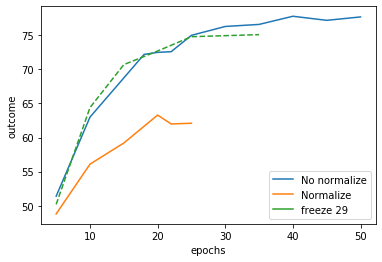

In [5]:
sns.lineplot(x=df2.epochs, y=df2.outcome, label='No normalize');
sns.lineplot(x=df4.epochs, y=df4.outcome, label='Normalize');
ax=sns.lineplot(x=df3.epochs, y=df3.outcome, label='freeze 29');
#ax = sns.lineplot(x=df4.epochs, y=df4.loss, label='loss N');
ax.lines[2].set_linestyle("--");

In [8]:
out1 ={0:29.99, 1:41.3, 2:46.49, 3:49.39, 4:51.84, 5:53.46, 6:55.18, 7:56.71, 8:57, 9:57.25}
los1 ={0:40.60, 1:47.6, 2:51.49, 3:54, 4:55.84, 5:57.46, 6:58.46, 7:59.3, 8:59.6, 9:59.82}
df2 = pd.Series(out1).to_frame('new_col').reset_index()
df2.columns=['epochs','outcome']
df3 = pd.Series(los1).to_frame('new_col').reset_index()
df3.columns=['epochs','outcome']

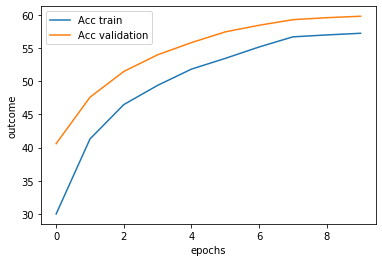

In [11]:
sns.lineplot(x=df2.epochs, y=df2.outcome, label='Acc train');
ax=sns.lineplot(x=df3.epochs, y=df3.outcome, label='Acc validation');

In [4]:
def get_folders(path):
    nofiles = []
    folder=path
    try:
        nofiles = [f for f in listdir(folder) if not isfile(join(folder, f))]
    except:
        print("FileNotFoundError: [Errno 2] No such file or directory: "+path)
    return nofiles

def get_files(path):
    files = []
    folder=path
    try:
        files = [f for f in listdir(folder) if isfile(join(folder, f))]
    except:
        print("get_files FileNotFoundError: [Errno 2] No such file or directory: "+path)
    return files

In [5]:
def delete_all_folders(path):
    shutil.rmtree(path)
    
def delete_folders_if(root, min_files=0, max_files=0, test=False):
    folders = get_folders(root)
    count = 0
    for fol in folders:
        files = get_files(root+fol)
        if len(files) > min_files and len(files) < max_files:
            count += 1
            if test:
                print("# BORRABLE["+str(count)+"] "+fol+"="+str(len(files)))
            else:
                shutil.rmtree(root+fol)
                print("BORRAT["+str(count)+"] --> "+fol+"="+str(len(files)))

def delete_files_if(listfile, delete_over=500):
    dellist = listfile[delete_over:]
    for file in dellist:
        os.remove(file)
    print('deleted '+str(len(dellist))+' files' )
    
def equalize_folders(root, folders, delete_over):
    print(len(folders),'folders')
    for fol in folders:
        folder = root + fol
        alist = [folder+"/"+f for f in listdir(folder) if isfile(join(folder, f))]
        #print(alist[:2])
        delete_files_if(alist, delete_over=delete_over)

In [6]:
#equalize_folders("train_processed2/train/",get_folders("train_processed2/train/"),4000)

In [40]:
#equalize_folders("train_processed2/validation/",get_folders("train_processed2/validation/"),1000)

In [8]:
train2num = get_folders("train_processed2/train/")
len(train2num)
train2num[:2]


85

['agkistrodon-contortrix', 'agkistrodon-piscivorus']

In [24]:
#delete_folders_if("train_2/",0,499,test=False)

BORRAT[1] --> natrix-maura=341
BORRAT[2] --> ahaetulla-prasina=233
BORRAT[3] --> phyllorhynchus-decurtatus=454
BORRAT[4] --> zamenis-longissimus=490
BORRAT[5] --> tropidoclonion-lineatum=404
BORRAT[6] --> python-bivittatus=236
BORRAT[7] --> naja-naja=285
BORRAT[8] --> heterodon-nasicus=442
BORRAT[9] --> vipera-aspis=410
BORRAT[10] --> nerodia-cyclopion=457
BORRAT[11] --> sistrurus-catenatus=379
BORRAT[12] --> xenodon-rabdocephalus=294
BORRAT[13] --> morelia-spilota=301
BORRAT[14] --> sistrurus-miliarius=216
BORRAT[15] --> virginia-valeriae=389
BORRAT[16] --> coronella-austriaca=413
BORRAT[17] --> natrix-tessellata=421
BORRAT[18] --> pseudechis-porphyriacus=263


In [26]:
#delete_folders_if("train_2/",1783,14000,test=False)

BORRAT[1] --> thamnophis-proximus=2111
BORRAT[2] --> nerodia-erythrogaster=3343
BORRAT[3] --> agkistrodon-contortrix=3552
BORRAT[4] --> pantherophis-obsoletus=3705
BORRAT[5] --> opheodrys-aestivus=2841
BORRAT[6] --> lampropeltis-triangulum=2753
BORRAT[7] --> agkistrodon-piscivorus=2849
BORRAT[8] --> storeria-dekayi=3705
BORRAT[9] --> nerodia-sipedon=3705
BORRAT[10] --> haldea-striatula=1913
BORRAT[11] --> pantherophis-alleghaniensis=2740
BORRAT[12] --> pantherophis-guttatus=1876
BORRAT[13] --> heterodon-platirhinos=2257
BORRAT[14] --> coluber-constrictor=2037
BORRAT[15] --> crotalus-atrox=3705
BORRAT[16] --> nerodia-rhombifer=2194
BORRAT[17] --> thamnophis-sirtalis=3705
BORRAT[18] --> crotalus-horridus=2592
BORRAT[19] --> pituophis-catenifer=3705
BORRAT[20] --> diadophis-punctatus=3033
BORRAT[21] --> lampropeltis-californiae=3324


In [35]:
root_1 = "train_images/"
root_2 = "train_2/"

nofiles = get_folders(root_1)
len(nofiles)
# 



85

In [37]:
def dict_images(root, inner_folders):
    d={}
    for fol in inner_folders:
        folder = root + fol
        alist = [f for f in listdir(folder) if isfile(join(folder, f))]
        d[fol]=len(alist)
    return d

In [38]:
def get_dictionary(root):
    d = dict_images(root,get_folders(root))
    rank_dict = sorted(d.items(), key=lambda x: x[1],reverse=True)
    return rank_dict


In [39]:
df = pd.DataFrame.from_dict(get_dictionary("train_images/"))
df.columns=['serps','n']

,serps,n
0,thamnophis-sirtalis,13754
1,storeria-dekayi,7466
2,pantherophis-obsoletus,7100
3,crotalus-atrox,6922
4,pituophis-catenifer,4976
5,nerodia-sipedon,4549
6,agkistrodon-contortrix,3552
7,nerodia-erythrogaster,3343
8,lampropeltis-californiae,3324
9,diadophis-punctatus,3033


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABCA2D4D30>]],
      dtype=object)

,serps,n
75,morelia-spilota,301
76,xenodon-rabdocephalus,294
77,naja-naja,285
78,pseudechis-porphyriacus,263
79,python-bivittatus,236
80,ahaetulla-prasina,233
81,sistrurus-miliarius,216
82,epicrates-cenchria,128
83,python-regius,77
84,vermicella-annulata,30


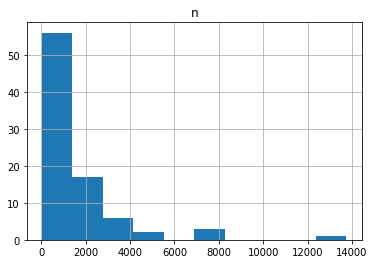

In [40]:
df.head(10)
df.hist();
df.tail(10)

,n
count,85.000000
mean,1526.800000
std,2019.388255
min,30.000000
25%,500.000000
50%,762.000000
75%,1782.000000
max,13754.000000


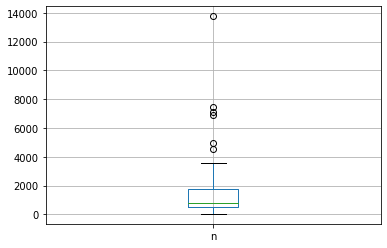

In [41]:
df.describe()
df.boxplot()

In [10]:
from shutil import copyfile
import random

def create_dir(path_):
    if not os.path.exists(path_):
        os.mkdir(path_)
        return 0
    else:
        thisfol = [f for f in listdir(path_) if isfile(join(path_, f))]
    return len(thisfol)
    
def min_max(min_force=0,max_force=14000):
    q1 = float(df.quantile(.25, axis = 0))
    q3 = float(df.quantile(.75, axis = 0))
    iqr = q3 - q1
    mi = int(max(min_force, q1 - (1.5 * iqr)))
    ma = int(min(max_force, q3 +1.5*iqr))
    return mi, ma

def get_list(folder, dest):
    ori = [folder+'/'+f for f in listdir(folder) if isfile(join(folder, f))]
    desti = [dest+'/'+f for f in listdir(folder) if isfile(join(folder, f))]
    return ori, desti

def cp(ori,desti):
    
    for f_ori, f_dest in zip(ori,desti):
        copyfile(f_ori, f_dest)

def copy_images(nofiles):
    mi, ma = min_max(200,500)
    root = "train_images/"
    r2 = "train_2/"
    create_dir(r2)
    
    for i,fol in enumerate(nofiles):
        folder = root + fol
        dest_folder = r2 +fol
        ori, desti = get_list(folder, dest_folder)
        try:
            ender=", EXIST"
            if len(ori) > mi and len(ori) <= ma:
                if create_dir(dest_folder) == 0:
                    cp(ori, desti)
                    ender=", created" 
                print("["+str(i)+"]"+dest_folder+": "+str(len(ori))+", mi="+str(mi)+", ma="+str(ma)+ender)
            elif  len(ori) > ma:
                if create_dir(dest_folder) == 0:
                    ender=", created" 
                    ori=ori[:ma]
                    desti=desti[:ma]
                    cp(ori, desti)
                print("["+str(i)+"]"+dest_folder+": "+str(len(ori))+", ma="+str(ma)+ender)
                #random.seed(123)
                #samples = random.sample(li,len(li))
            else:
                print("##  NOT WRITED: "+folder+str(len(ori))+", mi="+str(mi)+", ma="+str(ma))
        except:
            print(ori[:1])
            print(desti[:1])
            stop

In [42]:
test_folders = ['python-regius','vermicella-annulata','crotalus-ruber']
#copy_images(test_folders)
copy_images(nofiles)


[0]train_2/agkistrodon-contortrix: 500, ma=500, created
[1]train_2/agkistrodon-piscivorus: 500, ma=500, created
[2]train_2/ahaetulla-prasina: 233, mi=200, ma=500, created
[3]train_2/arizona-elegans: 500, ma=500, created
[4]train_2/boa-imperator: 500, ma=500, created
[5]train_2/bothriechis-schlegelii: 500, ma=500, created
[6]train_2/bothrops-asper: 500, ma=500, created
[7]train_2/carphophis-amoenus: 500, ma=500, created
[8]train_2/charina-bottae: 500, ma=500, created
[9]train_2/coluber-constrictor: 500, ma=500, created
[10]train_2/contia-tenuis: 500, ma=500, created
[11]train_2/coronella-austriaca: 413, mi=200, ma=500, created
[12]train_2/crotalus-adamanteus: 500, ma=500, created
[13]train_2/crotalus-atrox: 500, ma=500, created
[14]train_2/crotalus-cerastes: 500, ma=500, created
[15]train_2/crotalus-horridus: 500, ma=500, created
[16]train_2/crotalus-molossus: 500, ma=500, created
[17]train_2/crotalus-oreganus: 500, ma=500, created
[18]train_2/crotalus-ornatus: 500, ma=500, created
[19]

In [14]:
alist = ['test_images_small.tar.gz','test_metadata_small.tar.gz','train_images.tar.gz',
        'train_labels.tar.gz'] #'test_images_small.tar.gz',

In [15]:
def extract():
    folder="data/"
    for fname in alist:
        if (fname.endswith("tar.gz")):
            tar = tarfile.open(folder+fname, "r:gz")
            tar.extractall()
            tar.close()
        elif (fname.endswith("tar")):
            tar = tarfile.open(folder+fname, "r:")
            tar.extractall()
            tar.close()

In [16]:
# extract()

In [33]:
def get_files_size(path):
    ph = []
    for root, dirs, files in os.walk(path):
        for filename in files:
            path = os.path.join(root, filename)
            size = os.stat(path).st_size # in bytes
            if size < 500:
                print("<500:",filename, size)
            ph.append((filename, size))
        return ph

In [19]:
folders = get_folders("train_processed2/train/")
print(len(folders))
print(folders[:2])

85
['agkistrodon-contortrix', 'agkistrodon-piscivorus']


In [20]:
path = "train_processed2/train/" + folders[0]
sorted_by_second = sorted(get_files_size(path), key=lambda tup: tup[1])

In [21]:
print(len(sorted_by_second))
print(sorted_by_second[:2])


2841
[('0dda37b608.jpg', 13654), ('7e7b19bdec.jpg', 15902)]


In [22]:
sorted_by_second[0][0][-4:]

'.jpg'

In [34]:
def delete_if_bad(path, sorted_by_second):
    deleting = []
    deleting.append(path+str(len(sorted_by_second)))
    for (im, byts) in sorted_by_second:
        try:
            im = Image.open(path+im)
        except:
            deleting.append(path+im)
            os.remove(path+im)
    return deleting

In [27]:
def del_inner_folders_bad_files(path):
    folders = get_folders(path)
    deleted=[]
    for folder in folders:
        path_in = path+folder+"/"
        sorted_by_second = sorted(get_files_size(path_in), key=lambda tup: tup[1])
        deleted.append(delete_if_bad(path_in, sorted_by_second))
    return deleted

In [37]:
path = "train_processed2/train/"
deleted_train = del_inner_folders_bad_files(path)

path = "train_processed2/validation/"
deleted_val = del_inner_folders_bad_files(path)

In [38]:
print(len(deleted_train))
print(deleted_train)
print(len(deleted_val))
print(deleted_val)

85
[['train_processed2/train/agkistrodon-contortrix/2841'], ['train_processed2/train/agkistrodon-piscivorus/2279'], ['train_processed2/train/ahaetulla-prasina/186'], ['train_processed2/train/arizona-elegans/496'], ['train_processed2/train/boa-imperator/646'], ['train_processed2/train/bothriechis-schlegelii/401'], ['train_processed2/train/bothrops-asper/411'], ['train_processed2/train/carphophis-amoenus/726'], ['train_processed2/train/charina-bottae/626'], ['train_processed2/train/coluber-constrictor/1630'], ['train_processed2/train/contia-tenuis/540'], ['train_processed2/train/coronella-austriaca/330'], ['train_processed2/train/crotalus-adamanteus/627'], ['train_processed2/train/crotalus-atrox/4000'], ['train_processed2/train/crotalus-cerastes/428'], ['train_processed2/train/crotalus-horridus/2074'], ['train_processed2/train/crotalus-molossus/430'], ['train_processed2/train/crotalus-oreganus/449'], ['train_processed2/train/crotalus-ornatus/429'], ['train_processed2/train/crotalus-pyrrh

In [11]:
def fotli():
    for (im,size) in sorted_by_second:
        if im[-4:] not in ['.jpg','jpeg','.png','.ppm','.bmp','.pgm','.tif','tiff','webp']:
            print(im)

In [14]:
import pandas as pd

In [24]:
frame = pd.read_csv('train_labels.csv')

In [25]:
frame.head()

,hashed_id,country,continent,scientific_name,filename
0,fd148672d8,United States of America,North America,nerodia-sipedon,fd148672d8.jpg
1,09874637dc,United States of America,North America,nerodia-sipedon,09874637dc.jpg
2,12da366539,United States of America,North America,nerodia-sipedon,12da366539.jpg
3,69b2c09380,United States of America,North America,pantherophis-obsoletus,69b2c09380.jpg
4,c32413ddbb,United States of America,North America,crotalus-horridus,c32413ddbb.jpg


In [26]:
carpetes = list(frame.scientific_name.unique())
filenames = list(frame.filename)
sci_names = list(frame.scientific_name)

In [27]:
carpetes[:5]

['nerodia-sipedon',
 'pantherophis-obsoletus',
 'crotalus-horridus',
 'heterodon-platirhinos',
 'storeria-dekayi']

In [28]:
path = "train_images/"

def create_folders(carpetes):
    for nom in carpetes:
        if not os.path.exists(path+nom):
            os.makedirs(path+nom)
        else:
            print(nom+" ja existeix")

In [30]:
create_folders(carpetes)

nerodia-sipedon ja existeix
pantherophis-obsoletus ja existeix
crotalus-horridus ja existeix
heterodon-platirhinos ja existeix


In [31]:
path = "train_images/"
def move_images(sci_names, filenames):
    for sci, file in zip(sci_names,filenames):
        try:
            os.replace(path+file, path+sci+"/"+file)
        except:
            pass


In [32]:
move_images(sci_names, filenames)

In [33]:
print(sci_names[0])
print(filenames[0])
name = path+sci_names[0]+"/"+filenames[0]
print(name)

nerodia-sipedon
fd148672d8.jpg
train_images/nerodia-sipedon/fd148672d8.jpg


In [34]:

im = Image.open(name)
print (im.width)

580


In [ ]:
ph = []
for root, dirs, files in os.walk("test_images_small"):
    for filename in files:
        path = os.path.join(root, filename)
        size = os.stat(path).st_size # in bytes
        ph.append((filename, size))
sorted_by_second = sorted(ph, key=lambda tup: tup[1])
sorted_by_second[:5]